In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from ultimatetictactoe import ultimatetictactoe
from utils.board import BoardRotation, BoardReflection
from rl.agent import RandomAgent, NeuralAgent, ManualAgent, Policy 
from rl.independent_algo.reinforce import *
# from algo.base_algo.base_algo import state_to_tensor

import torch
from torch import nn
import torch.optim as optim

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import random
import pygame

from rl.agent import state_to_tensor

import pickle

In [3]:
env = ultimatetictactoe.env(render_mode="rgb_array")
env.reset(42)

envh = ultimatetictactoe.env(render_mode="human")
envh.reset()
# envh.render()

In [5]:
eps = 0.3
a1 = NeuralAgent("player_1", epsilon=eps, learning_power=6, exploration_power=2)
a2 = NeuralAgent("player_2", epsilon=eps, learning_power=10.5, exploration_power=1, exploration_const=0.5, learning_const=10)
print(f"exploration agent 1 {eps**2}")
print(f"exploration agent 2 {eps**1}")
print(f"learning rate agent 1 {eps**6}")
print(f"learning rate agent 2 {eps**10.5}")
am = ManualAgent("player_1")
ar = RandomAgent("player_2")
# a1.policy_net.load_state_dict(torch.load("rl/independent_algo/logs/checkpoints/long_val/2026_02_19_15_34_50/agent_1/model_3100.pt"))
# a2.policy_net.load_state_dict(torch.load("rl/independent_algo/logs/checkpoints/long_val/2026_02_19_15_34_50/agent_2/model_3100.pt"))

exploration agent 1 0.09
exploration agent 2 0.3
learning rate agent 1 0.0007289999999999998
learning rate agent 2 3.234246929812254e-06


# REINFORCE

In [6]:
a1.policy_net.train()
a2.policy_net.train()

Policy(
  (first_conv_net): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (second_conv_net): Sequential(
    (0): LazyConv2d(0, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): LazyConv2d(0, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (5): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (main_linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): LazyLinear(in_features

In [ ]:
# training
# 10_000 1h 15m
a1_losses, a2_losses, a, b, c = reinforce(env, a1, a2, 6000, enable_swap=True, enable_transform=True, px=0, pt=0, checkpoint_rate=100, validation_rate=100, experiment_name="const")

In [144]:
c = [a[i] for i in range(len(a)) if i%2==1]
a = [a[i] for i in range(len(a)) if i%2==0]

In [32]:
def extract_vlt(results):
    victories = []
    losses = []
    ties = []
    for res in results:
        v, l, t = res['results']
        victories.append(v)
        losses.append(l)
        ties.append(t)
    return np.array(victories), np.array(losses), np.array(ties)

In [35]:
v, l, t = extract_vlt(b)

In [36]:
v.argmax()

np.int64(30)

In [8]:
def plot_val(r):
    plt.figure(figsize=(16,6))
    victories = []
    losses = []
    ties = []
    for res in r:
        v, l, t = res['results']
        victories.append(v)
        losses.append(l)
        ties.append(t)
    plt.plot(victories, label="victory")
    plt.plot(losses, label="loss")
    plt.plot(ties, label="tie")
    plt.legend()

In [ ]:
ares = a['res']

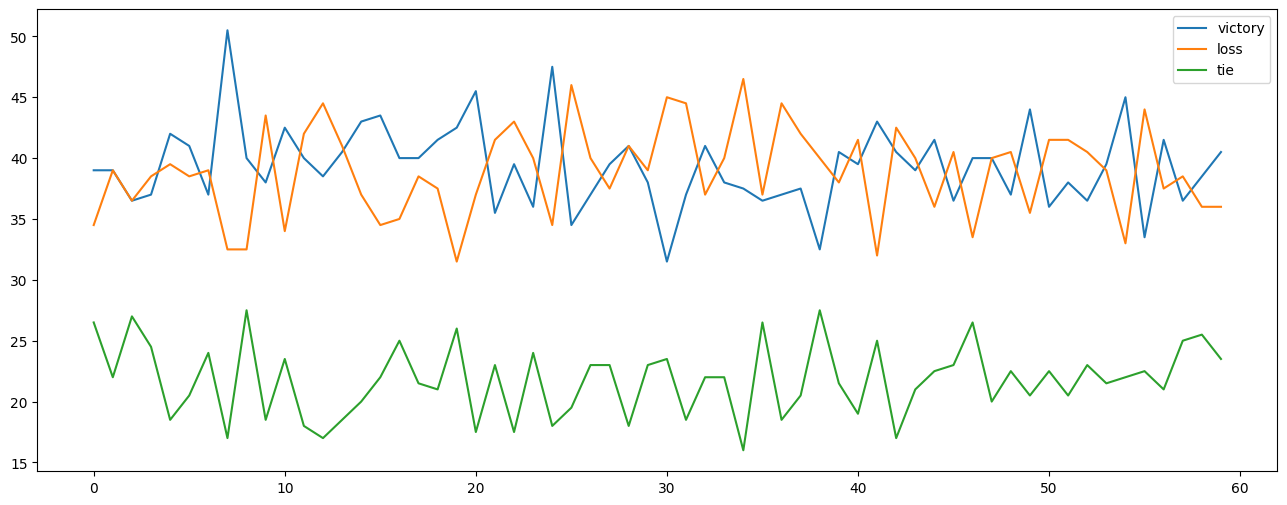

In [144]:
plot_val(c)

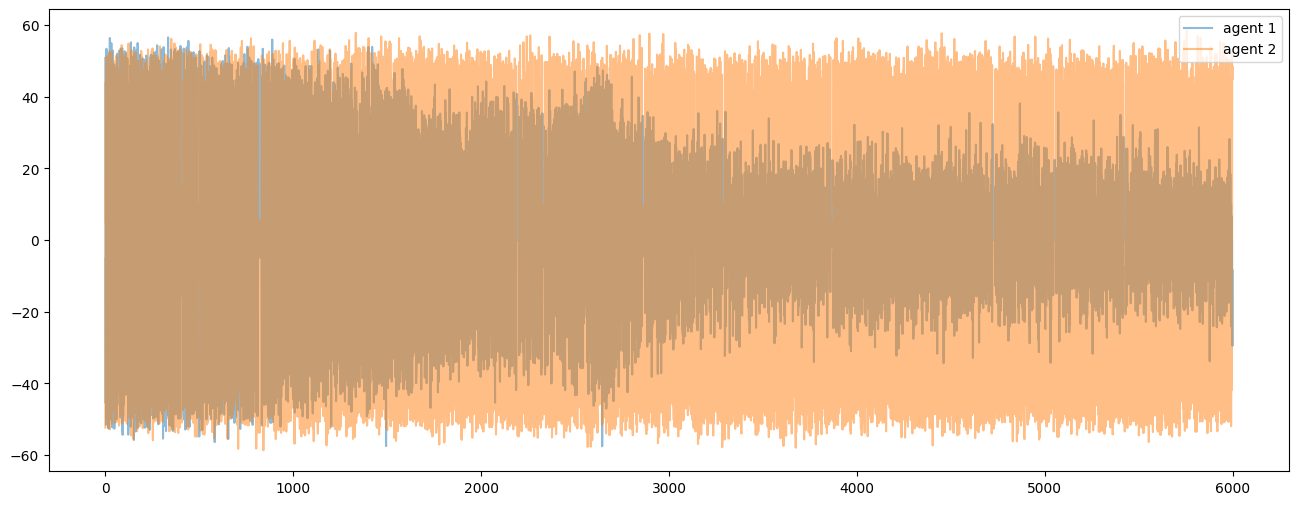

In [30]:
plt.figure(figsize=(16,6))
plt.plot(a1_losses, label="agent 1", alpha=0.5)
plt.plot(a2_losses, label="agent 2", alpha=0.5)
plt.legend()

# Stats

In [38]:
a1.mode = 'sample'
a2.mode = 'sample'
print('12')
sample_12 = compute_games(env, a1, a2, 500, True, False)
print('1R')
sample_1r = compute_games(env, a1, ar, 500, True, False)
print('2R')
sample_2r = compute_games(env, a2, ar, 500, True, False)

12
1R
2R


In [22]:
rrr = compute_games(env, ar, ar, 10000, True, False)

In [39]:
a1.mode = 'argmax'
a2.mode = 'argmax'
# print('12')
# argmax_12 = compute_games(env, a1, a2, 1000, True)
print('1R')
argmax_1r = compute_games(env, a1, ar, 500, True, False)
print('2R')
argmax_2r = compute_games(env, a2, ar, 500, True, False)

1R
2R


In [40]:
# sample
print(rrr['results'], rrr['rewards'].mean())
print(sample_12['results'], sample_12['rewards'].mean())
print(sample_1r['results'], sample_1r['rewards'].mean())
print(sample_2r['results'], sample_2r['rewards'].mean())

[38.4  38.81 22.79] -0.0038599999999999993
[59.4 21.  19.6] 0.38139999999999996
[53.8 27.4 18.8] 0.25980000000000003
[37.4 38.  24.6] -0.004599999999999998


In [41]:
# argmax
# print(rp['results'], rp['rewards'].mean())
print(argmax_1r['results'], argmax_1r['rewards'].mean())
print(argmax_2r['results'], argmax_2r['rewards'].mean())

[57.8 26.8 15.4] 0.30660000000000004
[31.4 42.8 25.8] -0.1128


In [81]:
plot_bar(sample_1r)

NameError: name 'plot_bar' is not defined

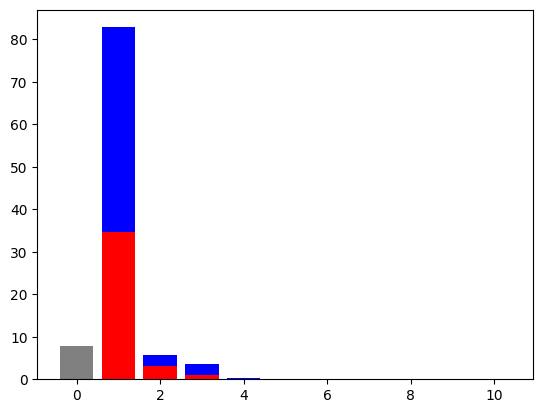

([0, 34.6, 3.2, 1.0, 0, 0, 0, 0, 0, 0, 0],
 [0, 48.2, 2.4000000000000004, 2.6, 0.2, 0, 0, 0, 0, 0, 0])

In [ ]:
plot_bar(argmax_2r)

In [30]:
confidence = 0.95
data = rrr['rewards']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, sem, ci

(np.float64(-0.015369999999999998),
 np.float64(0.008844020464686747),
 (np.float64(-0.03270606009037211), np.float64(0.0019660600903721077)))

In [43]:
confidence = 0.95
data = argmax_1r['game_turns']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, ci

(np.float64(56.95),
 (np.float64(56.384551504844836), np.float64(57.51544849515517)))

In [ ]:
# n = 10000
# envh.metadata['render_fps'] = 2
# macro_result = np.zeros(3)
# result_by_reward = {}
# rew1 = 0
# rew2 = 0
# for _ in range(n):
#     r = compute_trajectory_against_random(env, ar, a2)
#     reward_1 = r['player_1']['rewards'][-1]
#     rew1 += r['player_1']['rewards'][-1]
#     rew2 += r['player_2']['rewards'][-1]
#     if reward_1 == 1:
#         macro_result[0] += 1
#     elif reward_1 == -1:
#         macro_result[1] += 1
#     elif reward_1 not in [1, -1]:
#         macro_result[2] += 1
#     if reward_1 not in result_by_reward.keys():
#         result_by_reward[reward_1] = 1
#     else:
#         result_by_reward[reward_1] += 1

# for k in result_by_reward.keys():
#     result_by_reward[k] *= 100/n

### Random results
Macro view
- probability of win 41% lose 36.6% tie 22.4%
- average reward difference +0.046
Probability of results
- 0 -> 7.4%
- +1 -> 41% / -1 -> 36.56%
- 0.1 -> 5.28% / -0.1 -> 4.7%
- 0.2 -> 2.36% / -0.2 -> 2%
- 0.3 -> 0.3% / -0.3 -> 0.22%
- 0.4 -> 0.054% / -0.4 -> 0.038%
- 0.5 -> 0.001%
- 0.6 -> 0.001%

In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [48.03 27.67 24.3 ]
average reward 0.20818999999999965
full result {1: 48.03, -0.1: 4.97, -1: 27.67, 0.0: 8.0, 0.1: 6.43, -0.2: 1.69, 0.2: 2.5300000000000002, -0.30000000000000004: 0.08, 0.30000000000000004: 0.47000000000000003, 0.4: 0.1, -0.4: 0.03}


In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [41.78 36.29 21.93]
average reward 0.05403999999999998
full result {1: 41.78, 0.0: 7.22, 0.1: 5.03, -1: 36.29, -0.30000000000000004: 0.34, -0.2: 2.24, 0.2: 2.02, -0.1: 4.8500000000000005, 0.30000000000000004: 0.18, -0.4: 0.04, 0.4: 0.01}


In [ ]:
np.array(env.board.cells).reshape(9, 9)

array([[2, 2, 1, 1, 2, 2, 2, 1, 1],
       [1, 1, 1, 2, 2, 1, 2, 2, 0],
       [2, 2, 1, 1, 1, 2, 1, 1, 2],
       [1, 2, 0, 2, 0, 1, 1, 1, 2],
       [0, 1, 2, 2, 1, 2, 0, 2, 0],
       [1, 1, 2, 1, 2, 2, 2, 2, 0],
       [2, 1, 2, 1, 2, 1, 1, 1, 2],
       [1, 1, 2, 1, 0, 1, 2, 1, 1],
       [1, 2, 2, 2, 2, 1, 2, 1, 1]])

In [ ]:
env.board.sub_boards[0]

[[2 2 1]
 [1 1 1]
 [2 2 1]]

# Visualize activations

In [145]:
a1.mode = "sample"
a2.mode = "sample"

In [146]:
# get data
a1.eval()
a2.eval()
envh.metadata['render_fps']=52
TR = Trajectory(envh, a1, a2)
TR.compute(max_turn=49)
envh.render()

In [147]:
state, _, _, _, _ = envh.last()
data = state_to_tensor(state)

activations = {}
def get_activations(name):
    """Create hook function for layer given"""
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

model = a2.policy_net

In [148]:
model

Policy(
  (first_conv_net): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (second_conv_net): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (main_linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=5184, out_features=500, bi

In [149]:
model.first_conv_net[0].register_forward_hook(get_activations("second_conv_net.4"))
model.main_linear[5].register_forward_hook(get_activations("linear"))
model.final_linear.register_forward_hook(get_activations("final"))
# model.first_conv_net[5].register_forward_hook(get_activations("conv5"))
output = model(data)

In [150]:
# act = activations["second_conv_net.4"]
act = activations["final"]

In [151]:
act.shape

torch.Size([1, 81])

In [152]:
# a = [torch.ones((1, 16, 3, 3))*i for i in range(9)]
# x = torch.stack(a, dim=1).view(1, 3, 3, 16, 3, 3)
# x = x.permute(0, 3, 1, 4, 2, 5).reshape(1, 16, 9, 9)
# x.shape

In [153]:
from utils.plot_utils import plot_decision

In [154]:
output

tensor([[0.0000, 0.0000, 0.0500, 0.0677, 0.0513, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0752, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0517, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0742, 0.0000, 0.0415, 0.0466, 0.0680, 0.0828, 0.0000, 0.0561,
         0.0000, 0.0480, 0.0000, 0.0000, 0.0000, 0.0574, 0.0000, 0.0000, 0.0478,
         0.0542, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0598,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0676, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<AddBackward0>)

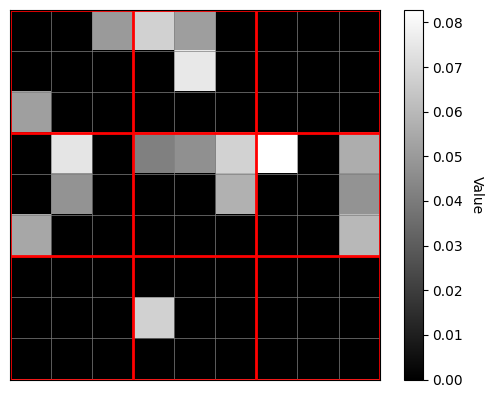

In [155]:
plot_decision(output)

In [156]:
act

tensor([[ 0.1296, -0.4480, -0.2386,  0.1970, -0.2001, -0.0656, -0.0453, -0.2758,
          0.3630,  0.1452,  0.2181, -0.0082,  0.0782,  0.3357,  0.2350,  0.1297,
          0.3151,  0.0536, -0.1877, -0.0445, -0.1974,  0.0814,  0.1754, -0.1909,
          0.0462, -0.2220,  0.1573, -0.1991,  0.3196, -0.1750, -0.5445, -0.3510,
          0.2034,  0.4598,  0.2280, -0.0674,  0.2660, -0.3038, -0.1609, -0.1534,
         -0.3673, -0.0326, -0.1690, -0.2721, -0.3101, -0.1190, -0.3348,  0.0779,
         -0.1162,  0.0740, -0.2585,  0.2920,  0.1760,  0.0250, -0.0938, -0.4870,
          0.2625,  0.4328,  0.2936, -0.3429, -0.1627,  0.2809,  0.2090, -0.0540,
         -0.1241,  0.0733,  0.1948, -0.0846, -0.2081, -0.0409,  0.2471,  0.1095,
          0.1515,  0.4306,  0.1117, -0.6422, -0.3566, -0.0568, -0.1174,  0.3444,
         -0.2730]])

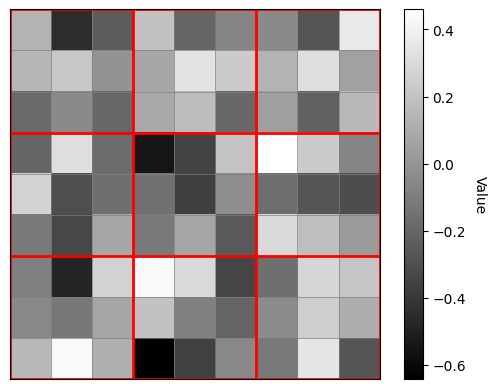

In [157]:
plot_decision(act.reshape(9, 9))